# Week 3

In this lab session we will see explore in more detail the following:
- Linear Regression
- Using linear regression on real world data
- Difference of Overfitting and Underfitting
- Polynomial Regression


# Linear Regression

## Task

Why are we using formula `y =  offset *X * np.random.rand(50,1) + (offset-X*offset/2)` to generate new dataset?
Because it closely reassembles real life accuracy of prediction over time (for example weather).

- Plot the data (hint: see [matplotlib](https://matplotlib.org/tutorials/) or take a look at some plotting code below or in lab one)
- Calculate linear regession for this dataset and plot it
- How can we increase accuracy? Try adding more points
- If you don't know how to plot the data, please check

## Tips

Check the Week 2 lab notebook, or continue with the remaining tasks in the Week 3 lab notebook, if you need help in completing certain initial tasks.

In [1]:
# These packages used throughout, run me first!
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import SGDRegressor

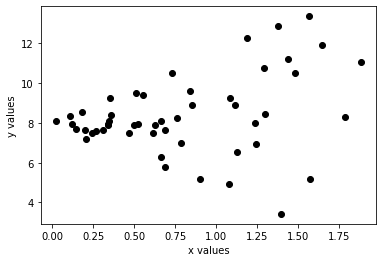

In [9]:
offset = 8
X_1 = 2 * np.random.rand(50, 1)
y_1 =  offset * X_1 * np.random.rand(50, 1) + (offset-X_1*offset/2)


# Code to plot the data
plt.xlabel('x values')
plt.ylabel('y values')
plt.scatter(X_1,y_1, label='My graph', color='k')
plt.show()

## Think about [multiple linear regression](https://en.wikipedia.org/wiki/Linear_regression#Simple_and_multiple_linear_regression)

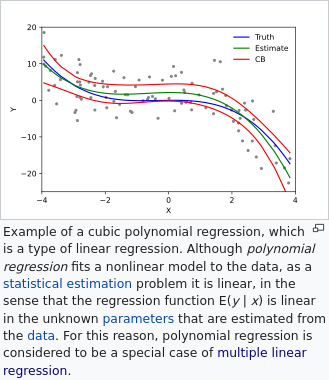

Above image and caption from Wikipedia

- Can we use linear regression for non linear functions?
- What are the issues with this approach?
- Look at the below plot and compare it with your previous plot: which dataset will likely result in a linear regression hypothesis that will fit its data best?

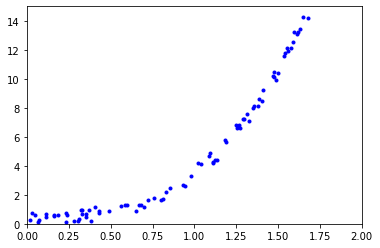

In [10]:
X_2 = 2 * np.random.rand(100, 1)
y_2 =  3 * np.power(X_2, 3) + np.random.rand(100, 1)

plt.plot(X_2, y_2, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

#graph is cubic so linear regression can't accurately represent the relationship between y and x

## Task

The utility method `sklearn.model_selection.train_test_split` has been imported for you. Use it to create the `X_train_2, X_test_2, y_train_2, y_test_2` sets, using a 70:30 split and the `X_2, y_2` dataset.

In [13]:
# Your code here: create your training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_2,y_2,train_size = 0.7)


30

## Task
- Now use `scikit-learn`'s `LinearRegression` to do linear regression
- How? Take a look at its [class documentation and examples](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)
- The `sklearn.linear_model.LinearRegression` class has already been imported for you as `LinearRegression`, which lets you create a linear regression model object that offers `.fit(X, y)` and `.predict(samples)` methods. Create the model and call it `lre_2` (linear regression for dataset 2)

In [15]:
# Your code here: perform Linear Regression using sci-kit learn's LinearRegression class, using your training sets
lre_2 = LinearRegression().fit(X_train,y_train)

### Task

How well does your model work? Use its `.predict(samples)` method with your testing samples.

Plot in a different colour the (1) training dataset, (2) testing dataset, (3) your model's estimation for the testing dataset.

Has your model captured the relationship between the dependent and independent variable well?

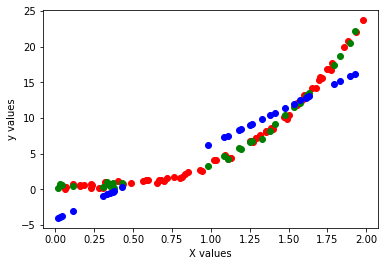

In [32]:
# Your code here: plot results

y_test_pred = lre_2.predict(X_test)



plt.xlabel('X values')
plt.ylabel('y values')
#training set plot in red
plt.scatter(X_train,y_train, color='r', label='training')
#testing set plot in green
plt.scatter(X_test,y_test,color='g')

#plot our models predictions in blue
plt.scatter(X_test, y_test_pred, color='blue')

#the graph shows that we can not accurately represent relationship between dependent and independent variable of the data with linear regression
#as the data is cubic


# Linear Regression on real data

To train a Linear Regression classifier on real life data, we will be using the `diabetes` dataset publicly available and visualising the resulting value of `theta`. 

The dataset is [described here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html?highlight=diabetes#sklearn.datasets.load_diabetes). **You can also hover over methods, library imports, and objects for quick info in Colab, handy!**

## Task
- Split the dataset into training and testing portions. Use an 80:20 split.
- Create the linear regression model

**Question 1/1**: What features are present in the `diabetes` dataset? Answer in SurreyLearn questions for this lab.

In [57]:
#testing with diabetes dataset
diabetes = datasets.load_diabetes()
diabetes_X = diabetes.data
diabetes_y = diabetes.target
print(diabetes_X.shape)
print(diabetes_y.shape)
print(diabetes_X[0])


(442, 10)
(442,)
[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990842 -0.01764613]


Before: (442, 10) After: (442, 1)
Think about: what did we just remove, exactly?
353
89


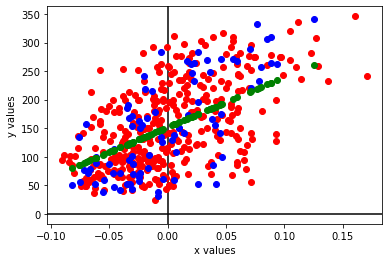

In [65]:
# Load the diabetes dataset
# Try hovering!     load_diabetes()
#                   vvvvvvvvvvvvvvv
diabetes = datasets.load_diabetes()

# Use only one feature
# None expands the dims, see: https://numpy.org/devdocs/user/basics.indexing.html#dimensional-indexing-tools
# This says
# 1. 'get all entries in the sample list',
# 2. 'create a new [] array dimension',
# 3. 'taking only the second index of each'
diabetes_X = diabetes.data[:, None, 2]
print('Before:', diabetes.data.shape, 'After:', diabetes_X.shape)
print('Think about: what did we just remove, exactly?')

# Your code here: split the dataset into X_train_dia, X_test_dia, y_train_dia, y_test_dia

diabetes_y = diabetes.target


X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y, train_size = 0.8 )
print(len(X_train))
print(len(X_test))
# Your code here: create the model
diabetes_model = LinearRegression()


# Your code here: train the model
diabetes_model.fit(X_train, y_train)
diabetes_test_pred = diabetes_model.predict(X_test)

# Your code here: plot the testing set (samples and targets) and the model's predictions for the testing samples
plt.xlabel('x values')
plt.ylabel ('y values')
plt.axhline(y = 0, color='black')
plt.axvline(x = 0, color= 'black')
#training in red
plt.plot(X_train,y_train, 'ro')
# test set in blue
plt.plot(X_test, y_test, 'bo')

#test predictions from our model in green
plt.plot(X_test, diabetes_test_pred,'go')

plt.show()


# Underfitting and Overfitting

The models have polynomial features of different degrees. We can see that a linear function (polynomial with degree 1) is not sufficient to fit the training samples. This is called **underfitting**.  
A polynomial of degree 4 approximates the true function almost perfectly. However, for higher degrees the model will **overfit** the training data, i.e. it learns the noise of the training data.  
We evaluate quantitatively overfitting / underfitting by using cross-validation. We calculate the **mean squared error (MSE)** on the validation set, the higher, the less likely the model generalizes correctly from the training data.

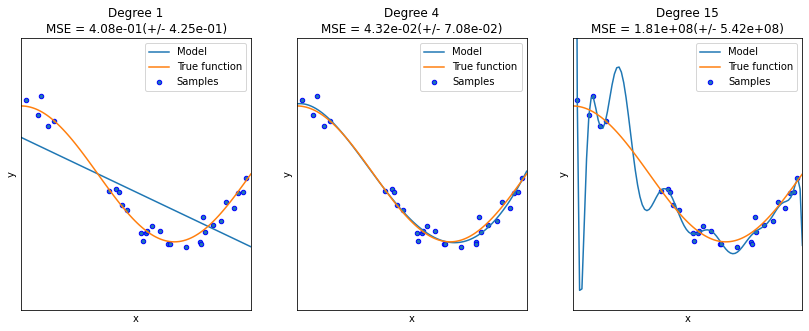

In [39]:
# Big code cell for some pretty graphs!

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

# Gradient Descent

This is an algorithm capable of finding optimal solutions to a wide range of problems.  
The parameters are tweaked to minimise the cost function.

However it is important to make sure that the **learning rate** is tweaked to an optimal value. Otherwise we can end up in a situation where the "step" is too small or too large. The undesired effects of that are as seen on the illustration below.

![Gradient Descent](https://raw.githubusercontent.com/wOOL/COM2028/master/W4/gd.png)

In addition, the cost functions very rarely look orderly like the ones used for demonstration pruposes above. Usually the have a complex shape.

This poses a new challenge - to avoid the Local minimum.

![Local Minimum](https://raw.githubusercontent.com/wOOL/COM2028/master/W4/local_min.png)

# Polynomial Regression

Polynomial Regression is a form of linear regression in which the relationship between the independent variable x and dependent variable y is modeled as an n-th degree polynomial.  

Polynomial regression fits a nonlinear relationship between the value of x and the corresponding conditional mean of y, denoted `E(y |x)`

If you need more information please read the following article in full:
https://www.geeksforgeeks.org/python-implementation-of-polynomial-regression/

In [58]:
# Generate some data
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

Now that we have generated data, we can plot it for better visualisation.

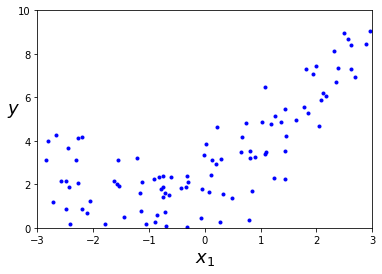

In [59]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [72]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
#creates a N-dimensional array containing original X values along with the degree transformed versions (in this case 1th and 2nd degree values)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])
#first print statement is an original X value
#2nd print statement shows one index from X_poly (2d array) showing the original value and its transformed version (this case squared)


[0.73007094]
[0.73007094 0.53300358]


In [61]:
X_poly[0]

array([0.73007094, 0.53300358])

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

## Task
- Let's plot the predictions in following

In [ ]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

# Your code here: plot the predictions

Need to consider which degree is most suitable, avoid **overfit** or **underfit**.

**Advantages** of using Polynomial Regression:

- Broad range of function can be fit under it.
- Polynomial basically fits wide range of curvature.
- Polynomial provides the best approximation of the relationship between dependent and independent variable.

**Disadvantages** of using Polynomial Regression

- These are too sensitive to the outliers.
- The presence of one or two outliers in the data can seriously affect the results of a nonlinear analysis.
- In addition there are unfortunately fewer model validation tools for the detection of outliers in nonlinear regression than there are for linear regression.


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()